In [1]:
# basically this means `import note_evaluation_helper`
%run 'note_evaluation_helper.ipynb'

[]


# Regression model for note splitting

In [2]:
import numpy as np
import soundfile as sf
import statsmodels.api as sm
import pandas as pd
from librosa import cqt

/anaconda3/envs/mir/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
def cqt_we_use_here(signal_to_ayse):
    '''how are we using the librosa CQT'''
    note = np.absolute(cqt(signal_to_ayse, 
           sr=44100, 
           hop_length=8000, 
           fmin=librosa.note_to_hz('B3'), 
           n_bins=72, 
           bins_per_octave=36))
    return note[0]

def lg_regression(signal_to_ayse):

#     filename = 'C4_61_64_67_71.wav'

    #number of keys (should be 12) to be considered here
    num_notes = 12

    #level of significance
    alpha = 0.00001

    # assuming that we have 12 vectors of length 4096: A,A_sharp,B.......G_sharp
    #these are the fourier transforms of the notes
    # then we can make a matrix X, with the columns as these notes

    #X is a 2048 by 12 matrix
    X = np.zeros((40,num_notes))

    plt.figure(figsize=(16,2))
    #reading the sound file

    for i in range(12):
        ref, sample_rate = sf.read('soundfile_template/C4_' + str(i+60) +'_x_x_x.wav')
        training_signal = ref[20000:24096,0]
        note_new = cqt_function_return_notesrum(training_signal)
        plt.plot(note_new, color="gray")
        X[:,i] = note_new
    
    assert len(training_signal) == 4096
    note_new = cqt_function_return_notesrum(signal_to_ayse)
    Y = note_new
    plt.plot(Y, color="red")
    plt.show()
    
    # define the predictors and target values in data frames
    x = pd.DataFrame(X)
    y = pd.DataFrame(Y)

    # Note the difference in argument order
    model = sm.OLS(y, x).fit()
    predictions = model.predict(x) # make the predictions by the model

    # Print out the statistics
    print(model.summary())
    
    print("r-squared value: ", model.rsquared)

    involved_notes = []
    for i in range(len(model.pvalues)):
        if model.pvalues[i] < alpha:
            involved_notes.append(i+60)

    print(involved_notes)
#     print("mystery chord is", filename)
    print("degree of significance, alpha is:", alpha)
    
    return involved_notes


['C4_60_64_68_x.wav', 'C4_61_68_70_71.wav', 'C4_60_61_66_69.wav', 'C4_65_68_69_70.wav', 'C4_62_67_68_70.wav', 'C4_60_64_66_70.wav', 'C4_62_66_70_71.wav', '.DS_Store', 'C4_63_65_69_x.wav', 'C4_60_61_64_x.wav', 'C4_60_66_69_70.wav', 'C4_64_67_71_x.wav', 'C4_60_62_69_x.wav', 'C4_62_63_69_71.wav', 'C4_62_64_65_71.wav', 'C4_63_68_70_x.wav', 'C4_60_64_70_x.wav', 'C4_67_69_70_71.wav', 'C4_60_61_62_69.wav', 'C4_60_62_65_68.wav', 'C4_64_67_69_x.wav', 'C4_67_70_71_x.wav', 'C4_62_65_67_x.wav', 'C4_64_67_70_71.wav', 'C4_60_69_71_x.wav', 'C4_63_65_68_x.wav', 'C4_60_63_66_69.wav', 'C4_60_62_65_70.wav', 'C4_62_70_x_x.wav', 'C4_63_66_68_69.wav', 'C4_61_68_69_x.wav', 'C4_65_67_69_71.wav', 'C4_60_63_64_x.wav', 'C4_67_71_x_x.wav', 'C4_64_68_69_x.wav', 'C4_62_63_64_70.wav', 'C4_60_61_64_70.wav', 'C4_60_65_67_71.wav', 'C4_60_62_63_65.wav', 'C4_63_66_67_70.wav', 'C4_67_68_69_x.wav', 'C4_60_64_68_69.wav', 'C4_65_66_67_71.wav', 'C4_61_62_66_69.wav', 'C4_65_69_x_x.wav', 'C4_60_66_67_69.wav', 'C4_64_65_70_71.wa

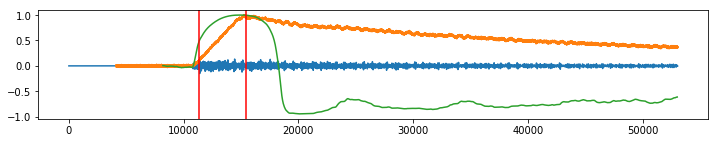

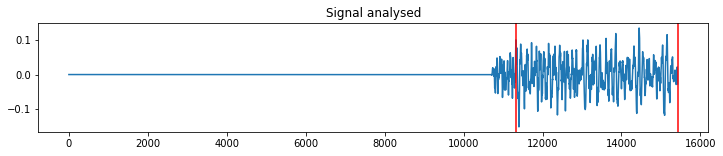

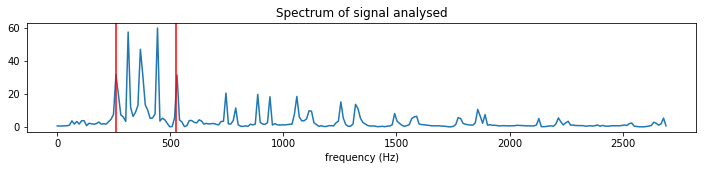

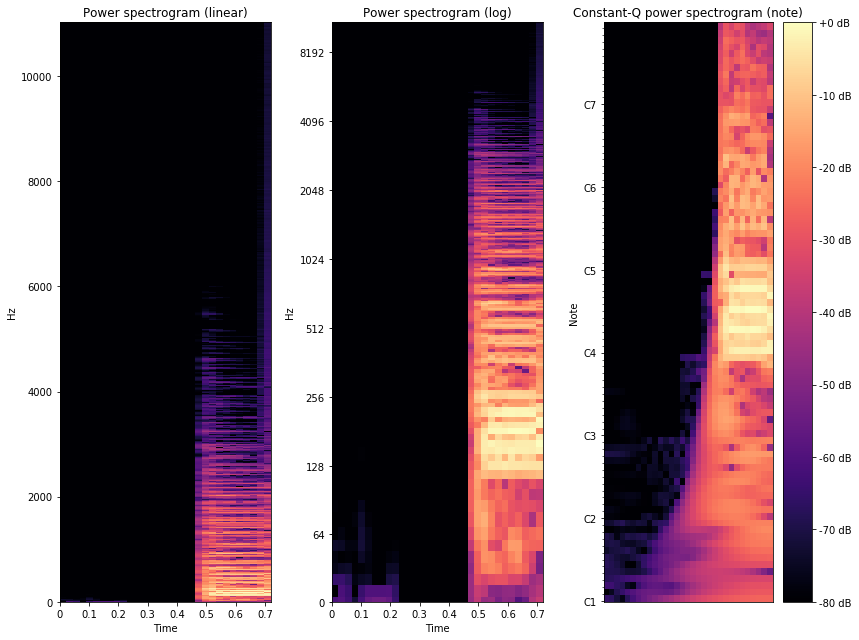

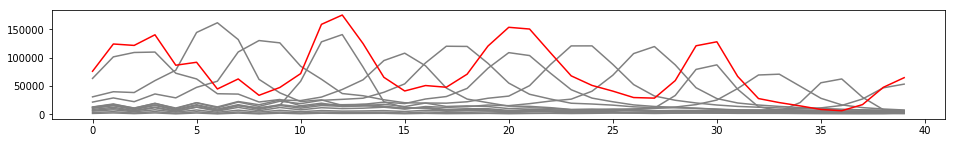

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1697.
Date:                Tue, 15 May 2018   Prob (F-statistic):           9.82e-37
Time:                        16:16:51   Log-Likelihood:                -379.91
No. Observations:                  40   AIC:                             783.8
Df Residuals:                      28   BIC:                             804.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.9596      0.022     43.757      0.0

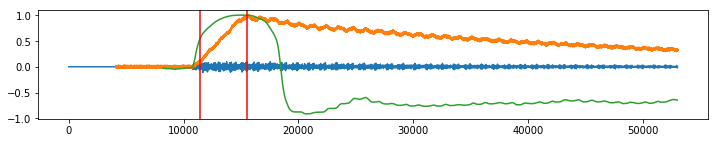

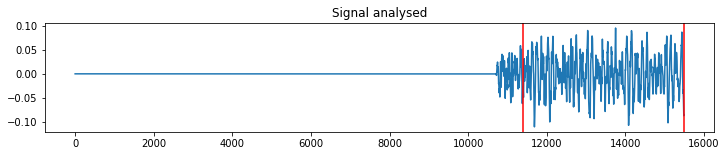

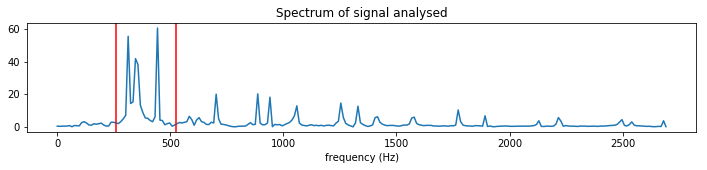

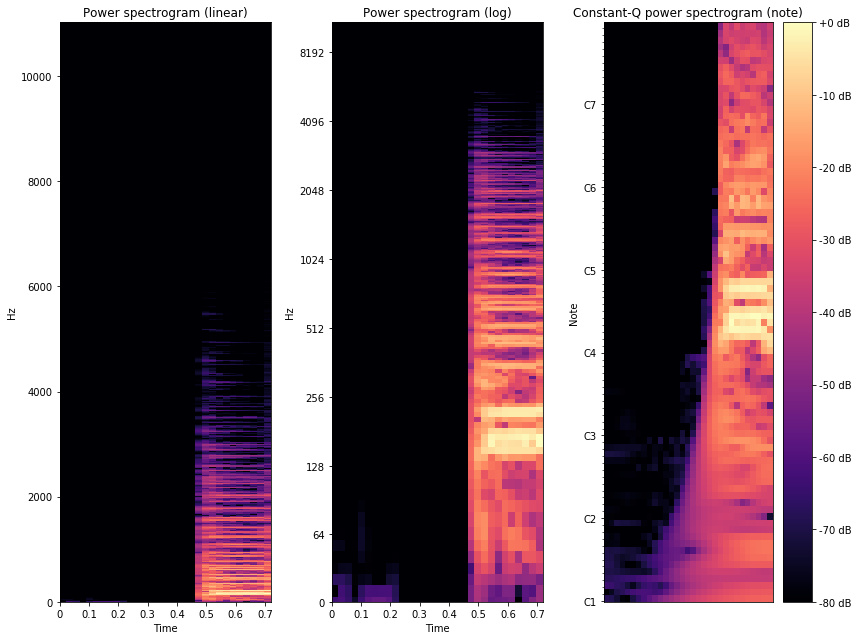

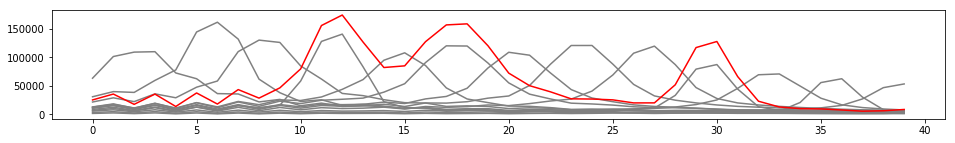

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5955.
Date:                Tue, 15 May 2018   Prob (F-statistic):           2.32e-44
Time:                        16:16:57   Log-Likelihood:                -349.43
No. Observations:                  40   AIC:                             722.9
Df Residuals:                      28   BIC:                             743.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0246      0.010     -2.407      0.0

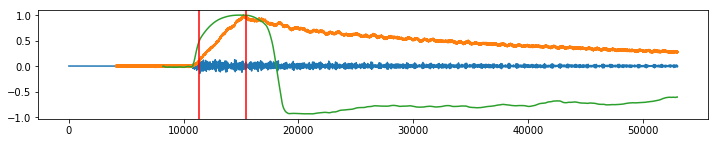

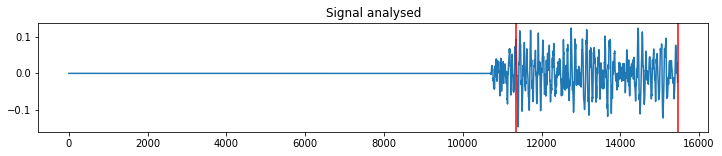

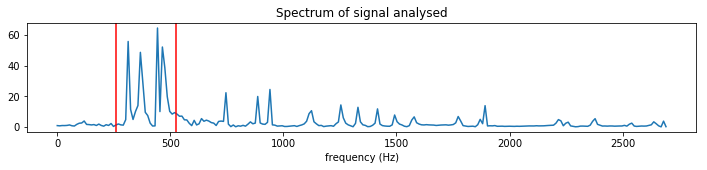

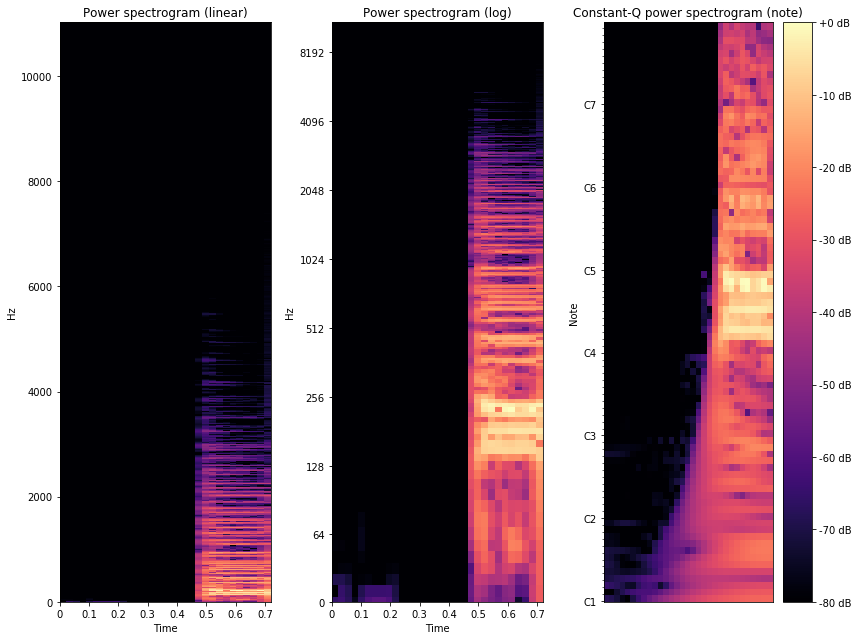

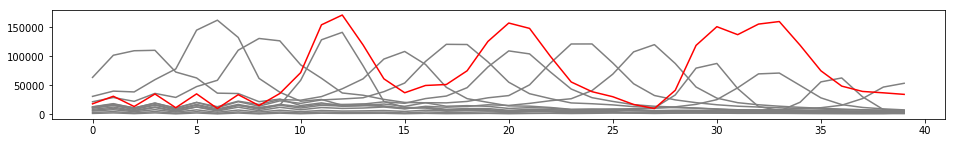

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     750.2
Date:                Tue, 15 May 2018   Prob (F-statistic):           8.69e-32
Time:                        16:17:02   Log-Likelihood:                -396.26
No. Observations:                  40   AIC:                             816.5
Df Residuals:                      28   BIC:                             836.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0439      0.033     -1.330      0.1

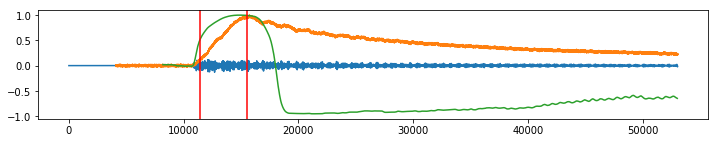

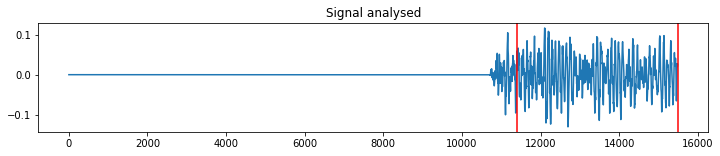

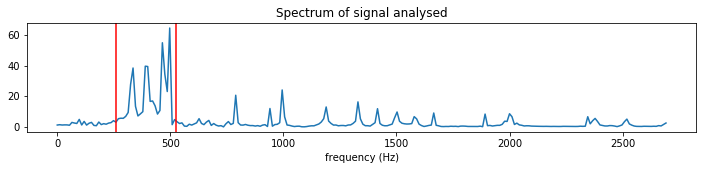

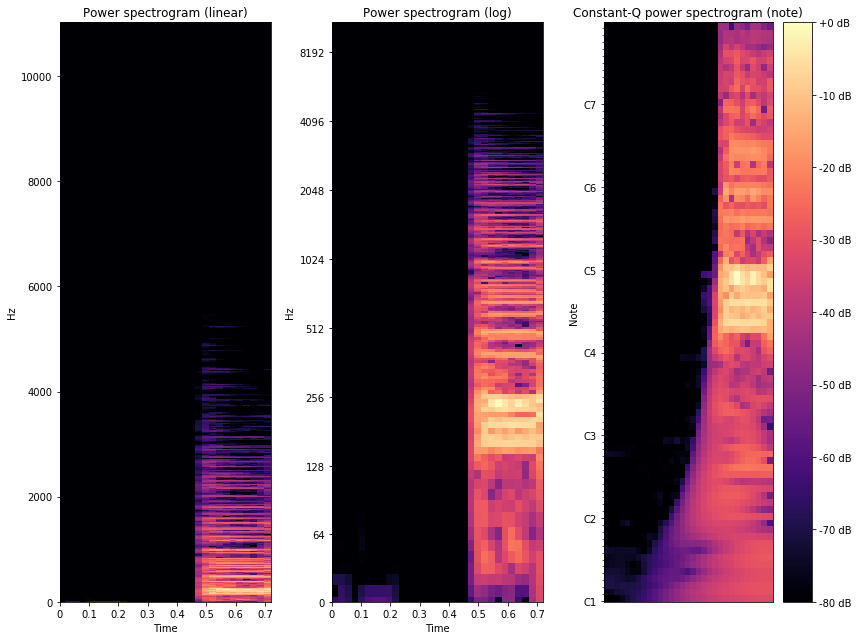

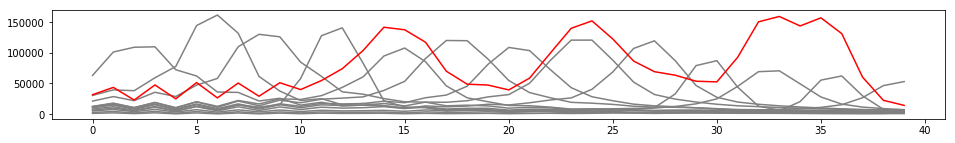

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     799.2
Date:                Tue, 15 May 2018   Prob (F-statistic):           3.60e-32
Time:                        16:17:07   Log-Likelihood:                -395.83
No. Observations:                  40   AIC:                             815.7
Df Residuals:                      28   BIC:                             835.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0840      0.033     -2.575      0.0

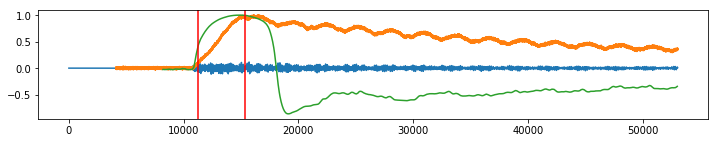

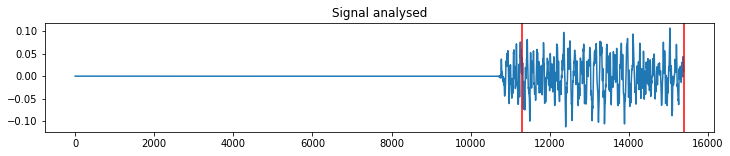

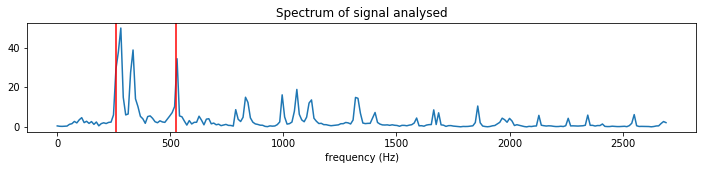

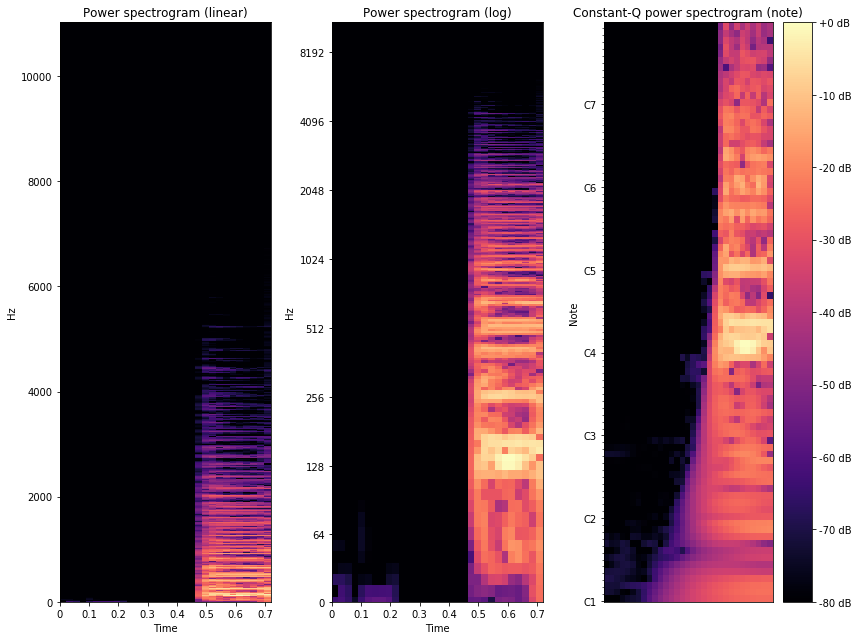

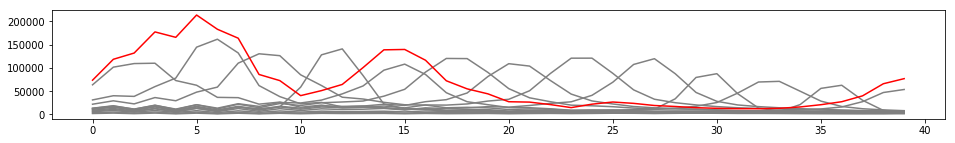

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     213.8
Date:                Tue, 15 May 2018   Prob (F-statistic):           3.23e-24
Time:                        16:17:12   Log-Likelihood:                -421.78
No. Observations:                  40   AIC:                             867.6
Df Residuals:                      28   BIC:                             887.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.8785      0.062     14.066      0.0

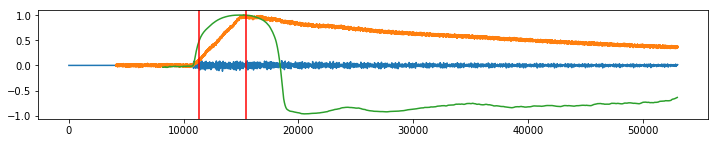

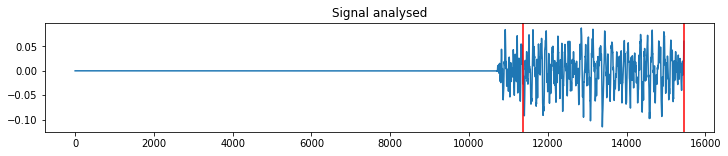

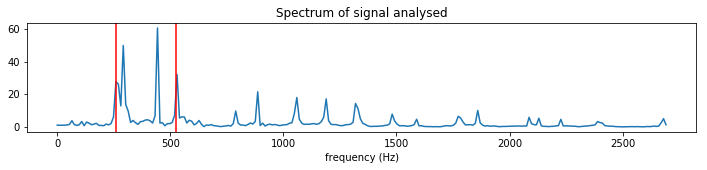

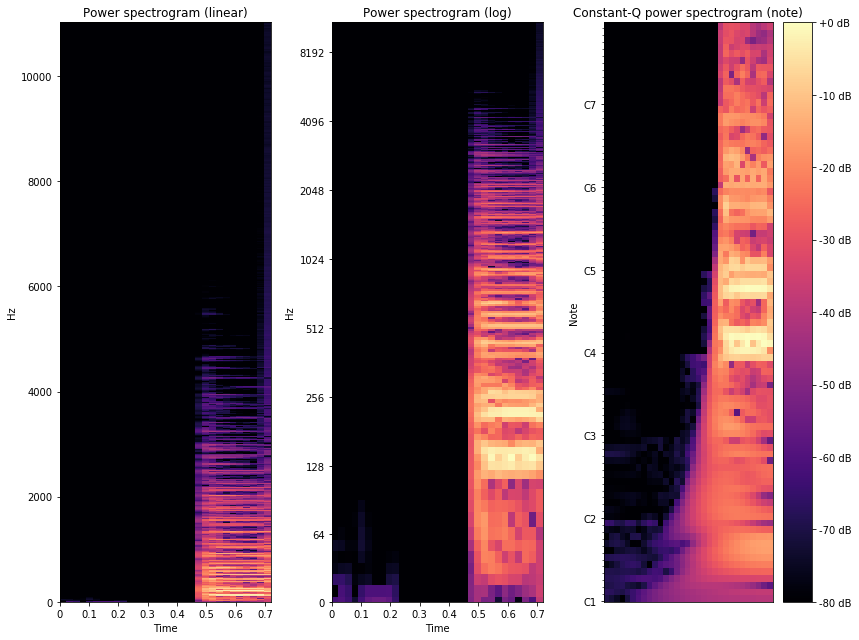

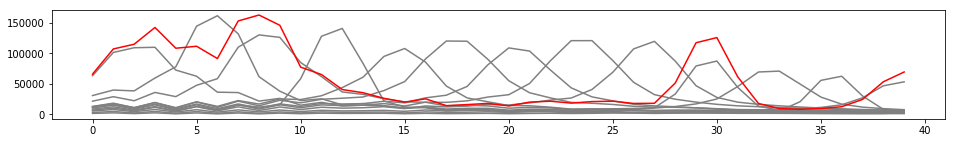

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     328.5
Date:                Tue, 15 May 2018   Prob (F-statistic):           8.47e-27
Time:                        16:17:18   Log-Likelihood:                -405.86
No. Observations:                  40   AIC:                             835.7
Df Residuals:                      28   BIC:                             856.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.8753      0.042     20.867      0.0

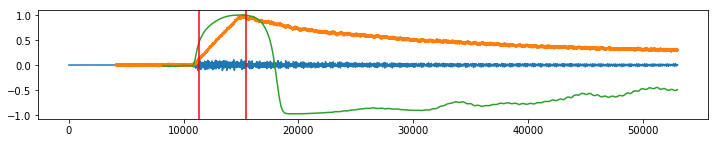

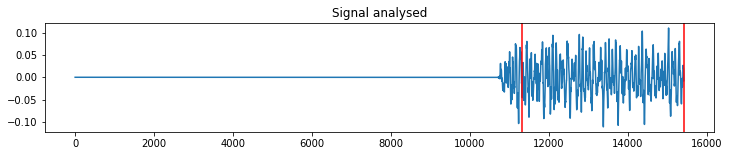

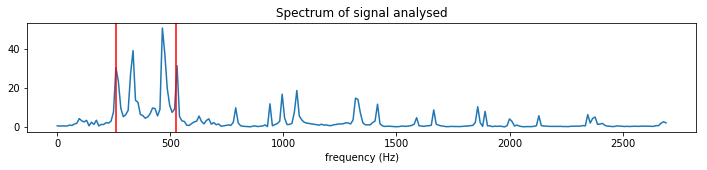

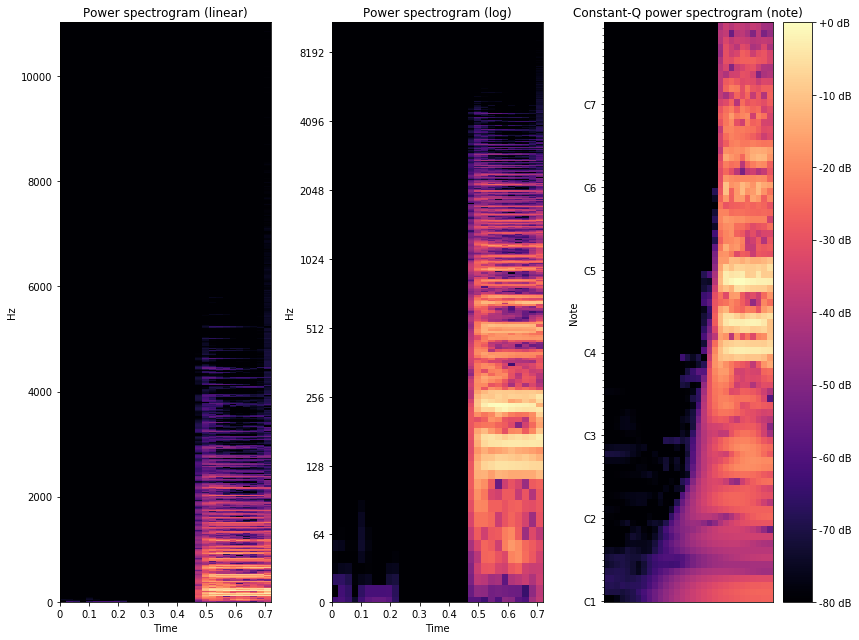

KeyboardInterrupt: 

<Figure size 1152x144 with 0 Axes>

In [5]:
if __name__ == '__main__':
    test_function_accuracy(lg_regression, plotting=True, deleting=True, generating=False)

C4_62_65_67_69


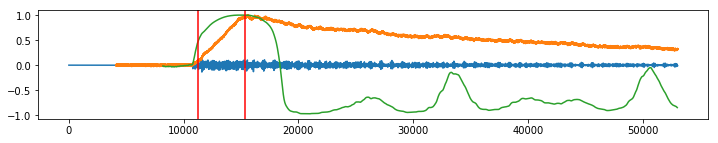

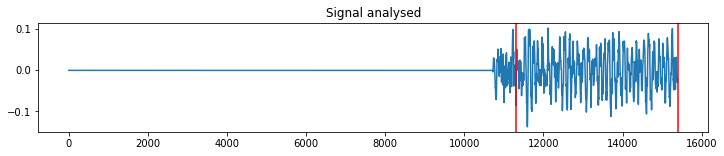

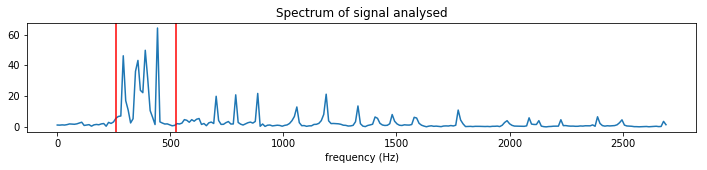

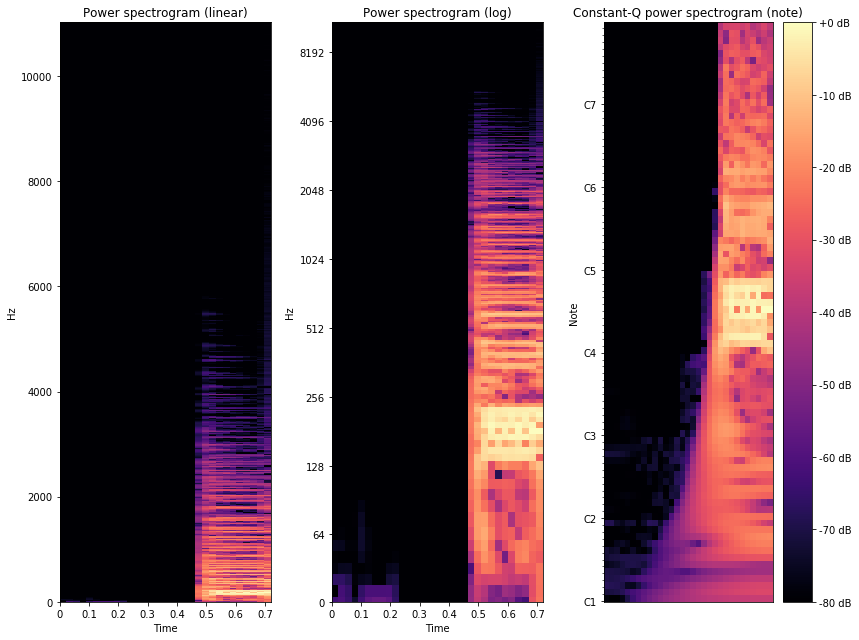

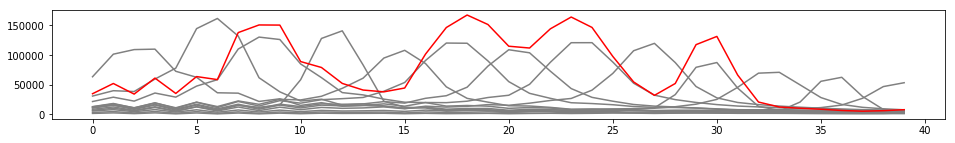

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1207.
Date:                Tue, 15 May 2018   Prob (F-statistic):           1.14e-34
Time:                        16:16:20   Log-Likelihood:                -388.61
No. Observations:                  40   AIC:                             801.2
Df Residuals:                      28   BIC:                             821.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0516      0.027     -1.894      0.0

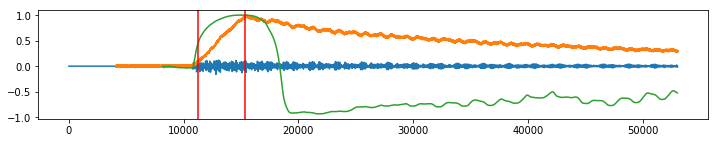

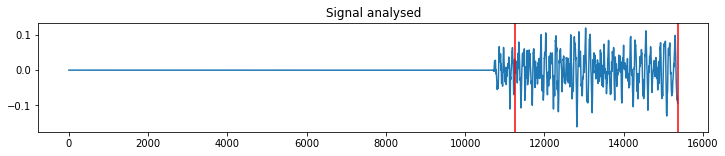

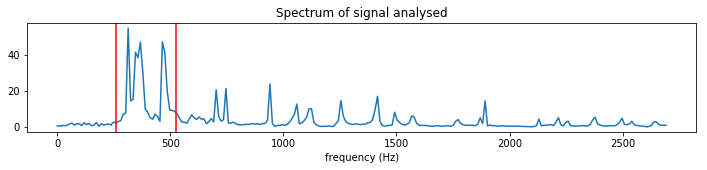

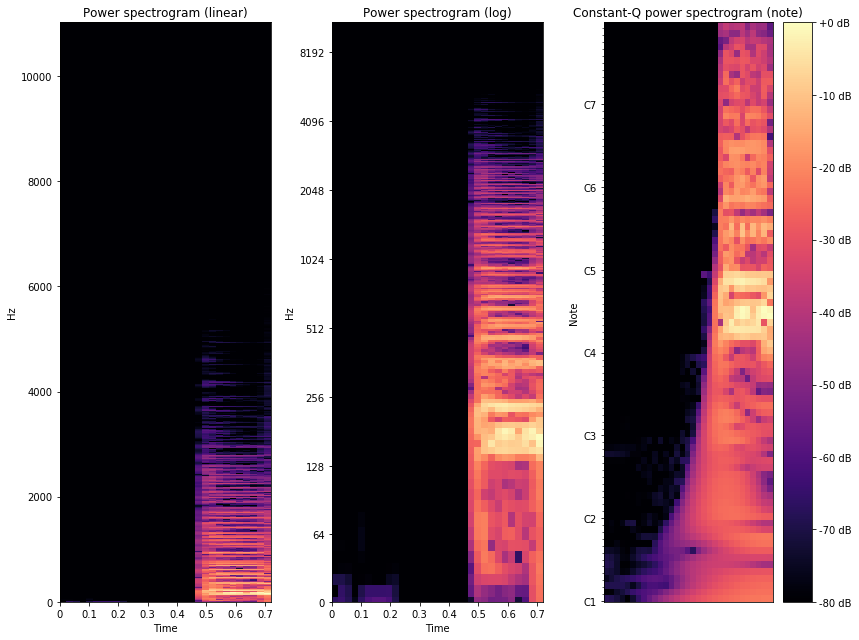

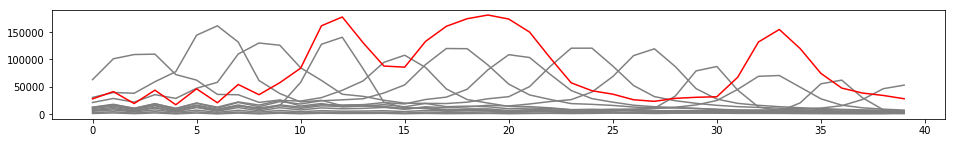

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     808.3
Date:                Tue, 15 May 2018   Prob (F-statistic):           3.07e-32
Time:                        16:16:26   Log-Likelihood:                -398.40
No. Observations:                  40   AIC:                             820.8
Df Residuals:                      28   BIC:                             841.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0632      0.035     -1.816      0.0

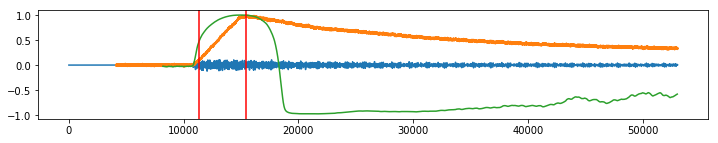

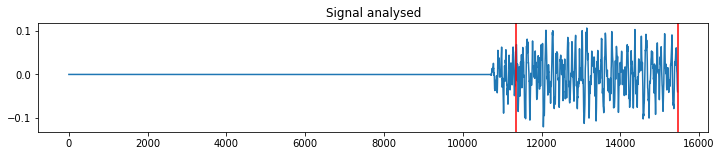

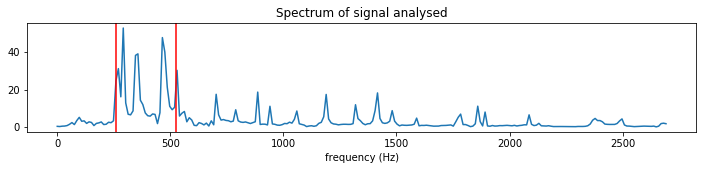

KeyboardInterrupt: 

In [4]:
# if __name__ == '__main__':
#     test_function_accuracy(lg_regression, plotting=True, deleting=True, generating=True)